# Encontro 09

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 6.2 (pág. 189).

**Hoje:**
1. Descrever modelos contínuos quanto aos resultados teóricos.
2. Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3. Contrastar resultados teóricos e empíricos.
4. Fechamento do conteúdo.

**Próxima aula:**
> 1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).

In [13]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

Nessa aula, teremos contato com algumas distribuições contínuas e como essas podem ser utilizadas para modelagem de dados reais.

**Distribuição Exponencial**

A distribuição Exponencial é conhecida, principalmente, por sua adequação na modelagem de variáveis que descrevem tempo de vida de produtos e materiais. Teoricamente, a função densidade de probabilidade (FDP) de uma distribuição Exponencial com parâmetro $\alpha$, com $\alpha > 0$, é definida por:

$$f(x;\alpha) = f(x) = \alpha e^{-\alpha x},$$

com $x \geq 0$. Quando uma variável $X$ tem distribuição Exponencial com parâmetro $\alpha$, pode-se afirmar que sua esperança e variância são dadas, respectivamente, por $E(X) = \frac{1}{\alpha}$ e $\mathrm{Var}(X) = \frac{1}{\alpha^2}$.

A Figura 1 mostra a distribuição Exponencial para alguns valores do parâmetro $\alpha = \frac{1}{2}; 1; \frac{3}{2}; 3$.

<img src="Exponencial1.png"/>
<center><sup>**Figura 1.** Função densidade de probabilidade da Exponencial para alguns valores de $\alpha$.</sup></center>

Para calcular a probabilidade da variável $X$ não exceder um valor $k$, é necessário obter a área abaixo da curva até esse ponto, isto é, calcular por integral a $P(X \leq k)$. Essa probabilidade pode ser obtida pela função de distribuição acumulada (FDA) no ponto $k$ que, no caso da Exponencial, é dada por:

$$F(k) = P(X \leq k) = \int^k_0 \alpha e^{-\alpha x} dx = 1 - e^{-\alpha k}$$

A Figura 2 mostra a função de distribuição acumulada da Exponencial para alguns valores do parâmetro $\alpha = \frac{1}{2}; 1; \frac{3}{2}; 3$.

<img src="Exponencial2.png"/>
<center><sup>**Figura 2.** Função de distribuição acumulada da Exponencial para alguns valores de $\alpha$.</sup></center>

Como notação, utiliza-se $X \sim \mathrm{Exp}(\alpha)$ e lê-se: “a variável $X$ segue uma distribuição Exponencial com parâmetro $\alpha$”.

> **O que ajuda e o que atrapalha as vendas pela internet**

> *Assim como no desenho animado da Warner em que o Coiote persegue o Papa-Léguas, na internet o mais rápido leva a melhor. Um levantamento recente da consultoria americana Aberdeen Group mostra que, a cada segundo que uma página de uma loja online demora para carregar, há uma queda de 7% na conversão de vendas.*

> <sup>Fonte: http://exame.abril.com.br/revista-exame-pme/edicoes/75/noticias/venda-muito-mais-pela-internet</sup>

1) Considere a variável $T$: tempo, em segundos, para abertura de um site de loja virtual de domínio brasileiro com média igual a $1.03$ segundos e que essa variável seja modelada por uma distribuição Exponencial.

1.1. A linha de comando descrita a seguir carrega uma base de dados com uma amostra dos tempos de carregamento de 100 lojas virtuais. 



Sabe-se que, se coincidirem com a distribuição teórica, os dados concordariam com uma distribuição exponencial  $T \sim \mathrm{Exp}\left(\frac{1}{1.03}\right)$. 

Compare a média (valor esperado) e a variância da amostra com as da distribuição exponencial com $\alpha = \left(\frac{1}{1.03}\right) $. A amostra seria bem modelada (ou seja descrita, resumida) por esta distribuição?

In [14]:
tempos = pd.Series.from_csv("tempos.csv")

m = tempos.mean()
v = tempos.var()

print("Média:", m)
print("Variância:", v)

Média: 0.8596562354426177
Variância: 0.9103308633357287


> ** Média ** = $(1/\alpha)$ = 1.03 (Teórico)

> ** Média ** = 0.8596562354426177 (Experimental)

> ** Variância ** = $(1/{\alpha^2})$ = 1.0609 (Teórico)

> ** Variância ** = 0.9103308633357287 (Experimental)

> A amostra parece estar coerente, porém, poderiamos mudar o a para a = 0.86

1.2. Graficamente, há algumas opções para levantar indícios se uma distribuição de probabilidade irá fornecer um ajuste razoável aos dados. Dentre essas opções, temos:

* Histograma dos dados *versus* função densidade de probabilidade teórica.

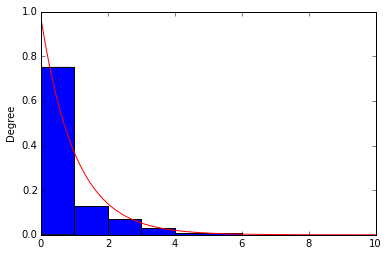

In [15]:
mu = 1.03
n = 100

# histograma e densidade teórica
pd.DataFrame.plot(kind='hist', data=tempos, bins=range(0, 11), normed=True, legend=False)
a = pd.Series(range(1, 1001)) / 100
plt.plot(a, stats.expon.pdf(a, scale=mu), '-', color='red')

* Quantis empíricos (dados ordenados) *versus* quantis teóricos.

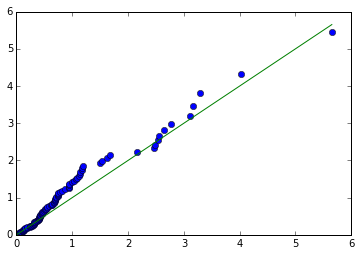

In [16]:
# dados ordenados e quantis teóricos - QQplot
#tempos = tempos.copy()
tempos = tempos.sort(inplace=False)
fra = [] # frequencia relativa acumulada
for i in range(n):
  fra.append((i + 0.5) / n) # ver Magalhães e Lima (pag. 195)

q = stats.expon.ppf(fra, scale=mu) # quantis teóricos

plt.plot(tempos, q, 'o')
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')

* Frequência relativa acumulada (a partir dos dados) *versus* função de distribuição acumulada.

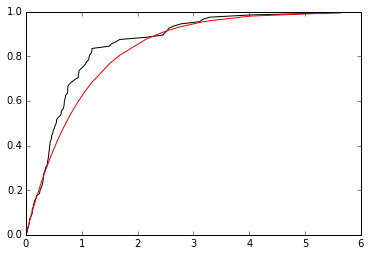

In [17]:
# fra e FDA
fda = stats.expon.cdf(tempos, scale=mu) #FDA

plt.plot(tempos, fra, '-', color='black')
plt.plot(tempos, fda, '-', color='red')

Considerando os gráficos anteriores, descreva se há indícios de concordância entre modelo teórico e dados (amostra simulada). Note que seus argumentos devem ser respaldados em cada resultado gráfico.

> Gráfico 1: Este gráfico poderia ser dividido em um maior número de bins, ou seja, poderiam existir um maior número de divisões no histograma.

> Gráfico 2: Este gráfico está bom, pois mostra que os Quantis empíricos, ou seja, os dados ordenados, estão razoavelmente alinhados com os teóricos.

> Gráfico 3: Este gráfico, apesar de estar razoavel, poderia ficar muito melhor se ajustassemos o parâmetro $\alpha$ na fórmula $$f(x;\alpha) = f(x) = \alpha e^{-\alpha x},$$ Tornando as duas funções mais próximas uma da outra.

1.3. Qual o % de lojas na amostra que demoram mais do que um segundo para abrir o site? E qual a probabilidade desse resultado acontecer? Esses resultados deveriam ser iguais? Por quê?

> A porcentagem de lojas é de 25% (ver linha 28), e a probabilidade de isso acontecer é de $ \frac{25}{100} $, $0.25$ ou $\frac{1}{4}$, ou seja a mesma que a porcentagem. Isso ocorre pois, a probabilidade se da pelo número de casos favoráveis sobre o número de casos possíveis, que no caso, são iguais aos números eventos que ocorrem sobre o espaço amostral.

1.4. **Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?**

> A necessidade de um modelo probabilístico é o fato de que, se ajustarmos o modelo teórico aos dados experimentais, podemos obter uma previsão sobre o que irá acontecer o futuro. Isso é algo muito interessante pois assim, nós deixamos de ter apenas um modelo da realidade e passamos a ter um modelo que prevê resultados. 

> Além disso, os dados experimentais são aplicados a um grupo experimental muito pequeno comparado ao objetivo final da pesquisa. Por exemplo, o caso de analisar o tempo que a página de um site demora para carregar. Para responder essa pergunta, apenas alguns sites foram pegos para a experimentação. E justamente o modelo probabilístico consegue transformar essa escala pequena em uma escala padrão, geral.

2) Há outros modelos probabilísticos contínuos:

* Uniforme
* Normal
* **Gamma**
* t-Student
* LogNormal
* Beta
* F-Snedecor


Cada grupo de alunos deve ficar com uma distribuição e deve realizar as seguintes atividades (**num IPython Notebook à parte**, que deve ser publicado no **Github** e ter seu link divulgado para a sala até 24/9):


2.1. Gere um plot da densidade de probabilidade da distribuição e de sua cumulativa. Descubra como usando o pacote scipy.stats

2.2. Qual a forma analítica (expressão) da distribuição?

2.3. Quais parâmetros descrevem a distribuição?

2.4. Existe uma fórmula específica para calcular esperança (média) e variáncia em função dos parâmetros?

2.5. Que tipo de aplicações tem esta distribuição? Em que tipo de dados é normalmente encontrada?

2.6. Essa distribuição é útil para a inferência estatística? (Os Capítulos 7 e 8 do Magalhães darão uma idéia de se sim ou não)


In [18]:
p = sum(tempos[tempos > 1].value_counts())

total = sum(tempos.value_counts())

porcentagem = (p/total)*100
porcentagem

25.0